# **Práctica N°6: Operaciones lógicas y aritméticas**

**Importación de librerías**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Parte I:** Operaciones aritméticas

Ejercicio I - Suma

In [9]:
# Cargar las dos imágenes
imagen2 = cv2.imread("/content/COVID-1.jpg", cv2.IMREAD_GRAYSCALE)
imagen1 = cv2.imread("/content/COVID-10.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar la suma ponderada con pesos α=0.7 y β=0.3
alpha = 0.3  # Peso de la primera imagen
beta = 0.7   # Peso de la segunda imagen
gamma = 10     # Ajuste de brillo

imagen_resultado = cv2.addWeighted(imagen1, alpha, imagen2, beta, gamma)

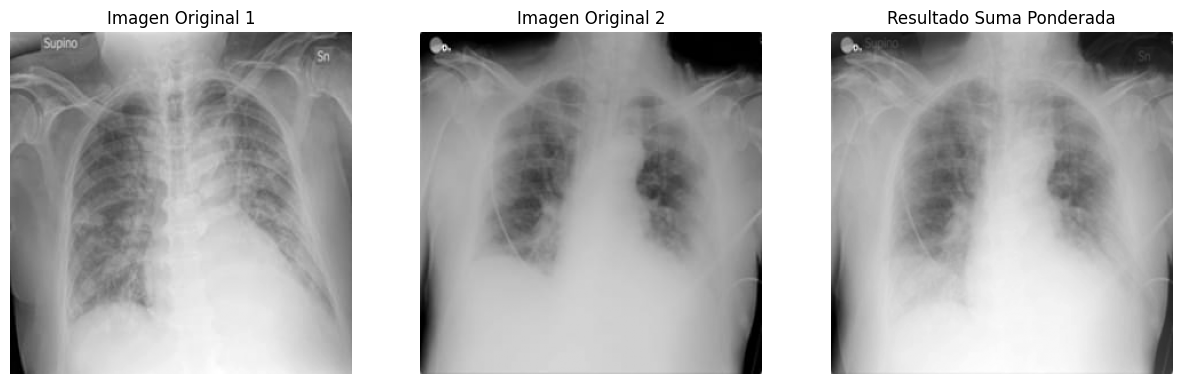

In [10]:
# Mostrar imágenes
plt.figure(figsize=(15, 5))

# Check if images were loaded successfully
if imagen1 is not None:
    plt.subplot(1, 3, 1)
    plt.imshow(imagen1, cmap="gray")
    plt.title("Imagen Original 1")
    plt.axis("off")
else:
    plt.subplot(1, 3, 1)
    plt.text(0.5, 0.5, 'Error loading Imagen Original 1', horizontalalignment='center', verticalalignment='center')
    plt.title("Imagen Original 1")
    plt.axis("off")


if imagen2 is not None:
    plt.subplot(1, 3, 2)
    plt.imshow(imagen2, cmap="gray")
    plt.title("Imagen Original 2")
    plt.axis("off")
else:
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, 'Error loading Imagen Original 2', horizontalalignment='center', verticalalignment='center')
    plt.title("Imagen Original 2")
    plt.axis("off")

if imagen_resultado is not None:
    plt.subplot(1, 3, 3)
    plt.imshow(imagen_resultado, cmap="gray")
    plt.title("Resultado Suma Ponderada")
    plt.axis("off")
else:
     plt.subplot(1, 3, 3)
     plt.text(0.5, 0.5, 'Error loading Imagen Resultado', horizontalalignment='center', verticalalignment='center')
     plt.title("Resultado Suma Ponderada")
     plt.axis("off")

plt.show()

Ejercicio II - Resta

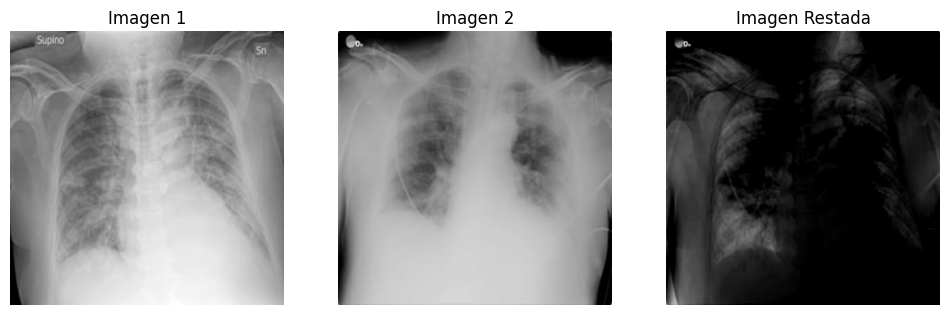

In [11]:
# Realizar la resta de imágenes
resta = cv2.subtract(imagen2, imagen1)  # OpenCV maneja el rango automáticamente

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Imagen Restada")
plt.axis("off")

plt.show()

Ejercicio III - Multiplicación por factor

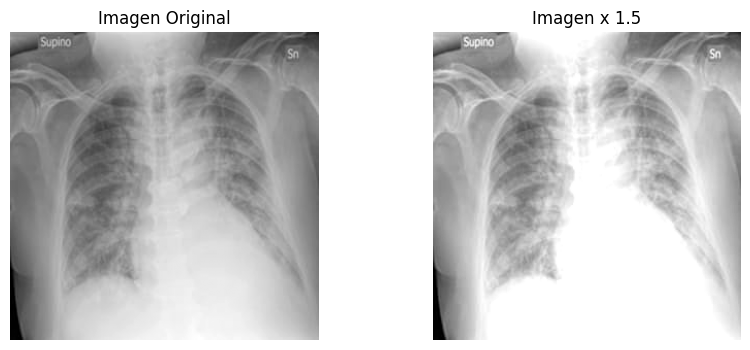

In [12]:
# Definir el factor de multiplicación
factor = 1.5  # Aumenta el brillo en un 50%

# Multiplicar la imagen por el factor
img_multiplicada = cv2.multiply(imagen1, np.array([factor], dtype=np.float32))

# Convertir la imagen a uint8 para visualización correcta
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar la imagen original y la modificada
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen1, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_multiplicada, cmap='gray')
plt.title(f"Imagen x {factor}")
plt.axis("off")

plt.show()

Ejercicio IV - Multiplicación por elemento

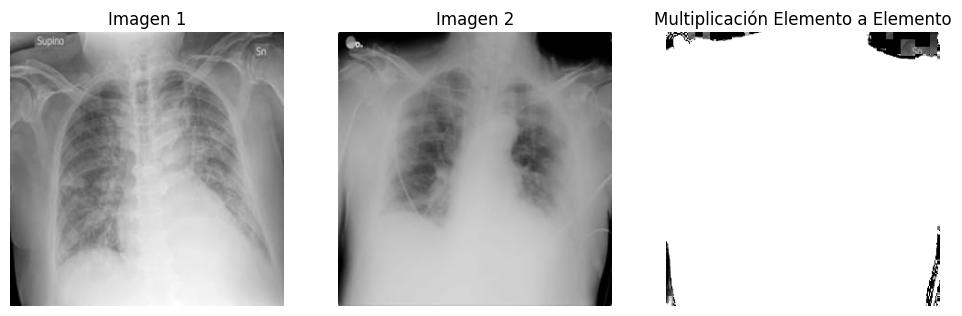

In [13]:
# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(imagen2, imagen1)  # OpenCV maneja el rango automáticamente

# Convertir la imagen resultante a uint8
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Elemento a Elemento")
plt.axis("off")

plt.show()

**Parte II:** Operaciones lógicas

Ejercicio I - Ecualización

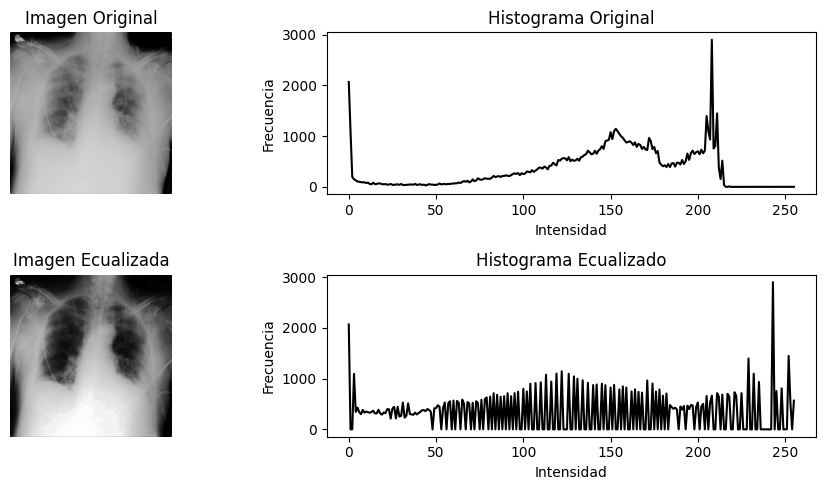

In [14]:

# Aplicar ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen2)

# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen2], [0], None, [256], [0,256])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])

# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**Parte III:** Preguntas

1.	**¿Cómo puede ayudar la suma de imágenes en la combinación de datos de distintas modalidades médicas?**

  Permite superponer imágenes anatómicas (como una RM) con imágenes funcionales (como un PET). Esto sirve para ver exactamente dónde está ocurriendo una actividad metabólica (ej. un tumor) dentro del cuerpo.

2.	**¿En qué situaciones se podría usar la resta de imágenes en el análisis biomédico?**

  Se usa para detectar cambios. Su principal aplicación es la Angiografía por Sustracción Digital (ASD), donde se resta una imagen base (sin contraste) de una imagen con contraste para ver únicamente los vasos sanguíneos.

3.	**¿Cómo afectan las operaciones lógicas a la segmentación de imágenes médicas?**

  Son clave para manipular máscaras o regiones de interés. Permiten combinar (con OR), encontrar intersecciones (con AND) o excluir áreas (con NOT), facilitando el aislamiento de estructuras específicas.